In [1]:
#import classes
from TrandingViewClasses import *


c:\Users\Person\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
class CompareCompaniesVisualizer2():

    def __init__(self, companies_data):
        self.companies_data = companies_data

        self.income_stat_params = IncomeStatementVisualizer(company_data=companies_data[0])
        self.balanse_sh_params = BalanceSheetVisualizer(company_data=companies_data[0])
        self.cashflow_params = CashflowStatementVisualizer(company_data=companies_data[0])
        self.statistics_params = StatisticsRatiosVisualizer(company_data=companies_data[0])


    def income_statement_visualizer_new(self, parameter_name):
        self.singleplot(parameter_name=parameter_name, type='income_statement')

    def balanse_sheet_visualizer_new(self, parameter_name):
        self.singleplot(parameter_name=parameter_name, type='ballance_sheet')

    def cashflow_statement_visualizer_new(self, parameter_name):
        self.singleplot(parameter_name=parameter_name, type='cashflow_statement')

    def statistics_ratios_visualizer_new(self, parameter_name):
        self.singleplot(parameter_name=parameter_name, type='statistics_ratios')

    def singleplot(self, parameter_name, type):

        fig = go.Figure()

        for company in self.companies_data:

            if type == 'income_statement':
                columns = company.income_statement.columns
                rows = company.income_statement.loc[parameter_name]
            elif type == 'ballance_sheet':
                columns = company.balanse_sheet.columns
                rows = company.balanse_sheet.loc[parameter_name]
            elif type == 'cashflow_statement':
                columns = company.cashflow_statement.columns
                rows = company.cashflow_statement.loc[parameter_name]
            elif type == 'statistics_ratios':
                columns = company.statistics.columns
                rows = company.statistics.loc[parameter_name]

            trace_name = f"{company.company_ticker} | {company.company_name}"# | {parameter_name}"
            fig = fig.add_trace(go.Scatter(x = columns, y= rows, name=trace_name))

        fig.update_xaxes(categoryorder='category ascending')  # sort X-axis (when X-axis of different companies contains different ranges i.e. 2015-2021, 2016-2022)
        fig.update_traces(mode="markers+lines", hovertemplate=None) #enable hover-mode, interactively display values on the graph when pointed with mouse
        fig.update_layout(hovermode="x", hoverlabel_namelength=-1,  title=parameter_name) #display the full parameter name
        fig.show()

    ##################################################################################################
   
    def income_statement_subplots(self, parameter_name):
        self.subplots(parameter_name=parameter_name, type='income_statement')

    def ballance_sheet_subplots(self, parameter_name):
        self.subplots(parameter_name=parameter_name, type='ballance_sheet')

    def cashflow_statement_subplots(self, parameter_name):
        self.subplots(parameter_name=parameter_name, type='cashflow_statement')

    def statistics_ratios_subplots(self, parameter_name):
        self.subplots(parameter_name=parameter_name, type='statistics_ratios')

    def subplots(self, parameter_name, type):

        fig = go.Figure()
        number_of_companies = len(self.companies_data)
        subplot_cols = 3
        subplot_rows = int(number_of_companies / subplot_cols) + (number_of_companies % subplot_cols > 0) #get integer rounded up
        subplot_titles = list(f'{company.company_ticker}|{company.company_name}' for company in self.companies_data) #get titles of subplots
        fig = make_subplots(rows=subplot_rows, cols=subplot_cols, subplot_titles=subplot_titles)
        fig_row = 1
        fig_col = 1

        for company in self.companies_data:
            
            if type == 'income_statement':
                columns = company.income_statement.columns
                rows = company.income_statement.loc[parameter_name]
            elif type == 'ballance_sheet':
                columns = company.balanse_sheet.columns
                rows = company.balanse_sheet.loc[parameter_name]
            elif type == 'cashflow_statement':
                columns = company.cashflow_statement.columns
                rows = company.cashflow_statement.loc[parameter_name]
            elif type == 'statistics_ratios':
                columns = company.statistics.columns
                rows = company.statistics.loc[parameter_name]


            trace_name = f"{company.company_ticker} | {company.company_name}"# | {parameter_name}"
            fig = fig.add_trace(go.Scatter(x = columns, y= rows, name=trace_name), row=fig_row, col=fig_col)

            if fig_col < subplot_cols:
                fig_col = fig_col+1
            else:
                fig_col=1
                fig_row = fig_row + 1

        fig.update_xaxes(categoryorder='category ascending')  # sort X-axis (when X-axis of different companies contains different ranges i.e. 2015-2021, 2016-2022)

        fig.update_traces(mode="markers+lines", hovertemplate=None) #enable hover-mode, interactively display values on the graph when pointed with mouse
        fig.update_layout(hovermode="x", hoverlabel_namelength=-1,  title=parameter_name) #display the full parameter name
        fig.update_layout(height=300*subplot_rows) #update the subplot height
        fig.update_layout(showlegend=False) #update the subplot height

        fig.show()

    ##################################################################################################

    def average_income_statement(self, parameter_name, top_companies = 15):
        self.average(parameter_name=parameter_name, top_companies=top_companies, type='income_statement')

    def average_ballance_sheet(self, parameter_name, top_companies = 15):
        self.average(parameter_name=parameter_name, top_companies=top_companies, type='ballance_sheet')

    def average_cashflow_statement(self, parameter_name, top_companies = 15):
        self.average(parameter_name=parameter_name, top_companies=top_companies, type='cashflow_statement')
    
    def average_statistics_ratios(self, parameter_name, top_companies = 15):
        self.average(parameter_name=parameter_name, top_companies=top_companies, type='statistics_ratios')

    def average(self, parameter_name, top_companies, type):
        companies_data = [] #collect company-data information, needed for export 
        companies_names = [] #collect copany-names, needed for visuals
        param_values = [] #collect average-value for respective parameter_name

        for company in self.companies_data:
            companies_data.append(company) #get company-data
            companies_names.append(f'{company.company_ticker} | {company.company_name}') #get company ticker and name
            
            if type == 'income_statement':
                param_values.append(company.income_statement.loc[parameter_name].mean()) #get average-values of the respetive parameter
            elif type == 'ballance_sheet':
                param_values.append(company.balanse_sheet.loc[parameter_name].mean()) #get average-values of the respetive parameter
            elif type == 'cashflow_statement':
                param_values.append(company.cashflow_statement.loc[parameter_name].mean()) #get average-values of the respetive parameter
            elif type == 'statistics_ratios':
                param_values.append(company.statistics.loc[parameter_name].mean()) #get average-values of the respetive parameter

        
        data = pd.DataFrame(list(zip(param_values, companies_data)), index=companies_names, columns =[parameter_name, 'company_data']) #convert lists to pandas
        data.sort_values(by=[parameter_name], axis=0, ascending=False, inplace=True) #sort data by respective parameter_name
        data = data.head(top_companies) #keep the top Nth company only
        # print(data)
        
        data_for_visualizing = data.drop(columns='company_data') #remove company_data colums from dataframe, not need for visuals
        output = data['company_data'].to_list() #get the company_data only, needed for export
        fig = px.bar(data_for_visualizing, orientation='h') #create a bar-chart
        fig.update_yaxes(autorange="reversed") #reverse y-exis to match dataframe top-to-bottom order
        # # fig.update_layout(barmode='stack', yaxis={'categoryorder': 'total ascending'})

        print(data_for_visualizing)
        fig.show()
        return output


In [3]:
#energy companies urls: https://docs.google.com/spreadsheets/d/1sB6xUwQiSjZHswlGERHotXPY1BhPRqUlH-qnGK3GJug/edit#gid=1612723324
companies_urls = ['NYSE-PXD','NYSE-CVX','NYSE-AMR','NASDAQ-CHRD','NASDAQ-FANG','NYSE-ARCH','NYSE-HES','NYSE-EOG','NYSE-COP','NYSE-VLO','NYSE-MPC','NYSE-XOM','NASDAQ-CHK','NYSE-PSX','NYSE-GPOR','NYSE-DEN','NASDAQ-PNRG','NYSE-CLR','NYSE-DVN','NYSE-CEIX','NYSE-OXY','NASDAQ-PDCE','NYSE-TRGP','NYSE-CIVI','NYSE-LPI','NYSE-NFG','NYSE-MTDR','NYSE-DINO','NYSE-NC','NYSE-OVV','NYSE-SM','NYSE-MUR','NYSE-CPE','NYSE-EQT','NYSE-NRP','NYSE-PBF','NYSE-CRC','NASDAQ-APA','NASDAQ-ROCC','NYSE-AR','NYSE-CVI','NYSE-HCC','NYSE-TECK','NYSE-NOG','NYSE-SBOW','NYSE-CTRA','NASDAQ-DMLP','NYSE-MRO','NYSE-RRC','NYSE-DK','NYSE-HESM','NYSE-WES','NYSE-BTU','AMEX-REPX','NASDAQ-ARLP','NYSE-MGY','NYSE-TALO','NYSE-PARR','NYSE-SD','NYSE-CNX','NYSE-CRK','NYSE-CLB','AMEX-MXC','AMEX-EP','NYSE-CRGY','NYSE-ESTE','NYSE-GPRK','AMEX-BATL','NASDAQ-METC','NASDAQ-SLNG','NASDAQ-KLXE','NYSE-PR','NASDAQ-MARPS','NYSE-AMPY','NYSE-SGU','NASDAQ-BRY','NYSE-VOC','AMEX-EPM','NYSE-WTI','NASDAQ-OPAL','AMEX-INDO','NYSE-SWN','NASDAQ-EPSN','NASDAQ-HNRG','NYSE-SXC','NASDAQ-NEXT','NYSE-KOS','NYSE-EGY','AMEX-HUSA','NYSE-PHX','NASDAQ-USEG','AMEX-BRN','AMEX-REI','AMEX-TELL','NASDAQ-AREC','AMEX-GTE','AMEX-SNMP','AMEX-CEI']
# companies_urls = ['NYSE-PXD','NYSE-CVX','NYSE-AMR','NASDAQ-CHRD','NASDAQ-FANG','NYSE-ARCH','NYSE-HES','NYSE-EOG','NYSE-COP','NYSE-VLO','NYSE-MPC','NYSE-XOM','NASDAQ-CHK','NYSE-PSX','NYSE-GPOR','NYSE-DEN','NASDAQ-PNRG','NYSE-CLR']
# companies_urls = ['NYSE-PXD','NYSE-CVX','NYSE-AMR','NASDAQ-CHRD','NASDAQ-FANG','NYSE-ARCH','NYSE-HES','NYSE-EOG']
# companies_urls = ['NYSE-PXD', 'NYSE-CVX']
companies_data = GetCompanyData.get_data(companies_urls)

# print(len(companies_data))
company = companies_data[0]
compare = CompareCompaniesVisualizer(companies_data=companies_data)


<b>
<font color='green'>
The Total Revenue is constantly growing
</font>
</b>

In [4]:
# compare.income_statement_visualizer_new(compare.income_stat_params.net_income_str)
# compare.balanse_sheet_visualizer_new(compare.balanse_sh_params.total_assets_str)
# compare.cashflow_statement_visualizer_new(compare.cashflow_params.free_cash_flow_str)
# compare.statistics_ratios_visualizer_new(compare.statistics_params.asset_turnover_str)


# companies_data = compare.average_parameter_value(compare.statistics_params.net_margin_percent_str)
# companies_data = compare.average_statistics_ratios(compare.statistics_params.net_margin_percent_str)
companies_data = compare.average_income_statement(compare.income_stat_params.net_income_str, top_companies=25)


# compare = CompareCompaniesVisualizer1(companies_data)

# compare.income_statement_subplots(compare.income_stat_params.net_income_str)
# compare.ballance_sheet_subplots(compare.balanse_sh_params.total_equity_str)
# compare.cashflow_statement_subplots(compare.cashflow_params.free_cash_flow_str)
# compare.statistics_ratios_subplots(compare.statistics_params.net_margin_percent_str)






                                            Net income
XOM | EXXON MOBIL CORPORATION             1.641750e+10
CVX | CHEVRON CORPORATION                 9.411625e+09
COP | CONOCOPHILLIPS                      3.498125e+09
PSX | PHILLIPS 66                         3.407500e+09
VLO | VALERO ENERGY CORPORATION           3.093000e+09
MPC | MARATHON PETROLEUM CORPORATION      2.091250e+09
EOG | EOG RESOURCES, INC                  1.829429e+09
PXD | PIONEER NATURAL RESOURCES COMPANY   1.345125e+09
TECK | TECK RESOURCES LTD                 9.538475e+08
CLR | CONTINENTAL RESOURCES, INC          8.028988e+08
CTRA | COTERRA ENERGY INC                 7.672525e+08
DINO | HF SINCLAIR CORPORATION            6.694538e+08
WES | WESTERN MIDSTREAM PARTNERS, LP      5.426662e+08
FANG | DIAMONDBACK ENERGY, INC            3.590338e+08
HCC | WARRIOR MET COAL, INC               3.053286e+08
PBF | PBF ENERGY INC                      3.023938e+08
NFG | NATIONAL FUEL GAS COMPANY           2.575312e+08
ARLP | ALL

<b>
<font color='green'>
Gross Profit is constantly growing
</font>
</b>

In [8]:
company_income_statement.operating_income()

NameError: name 'company_income_statement' is not defined

<b>
<font color='green'>
Pretax Income is constantly growing
</font>
</b>

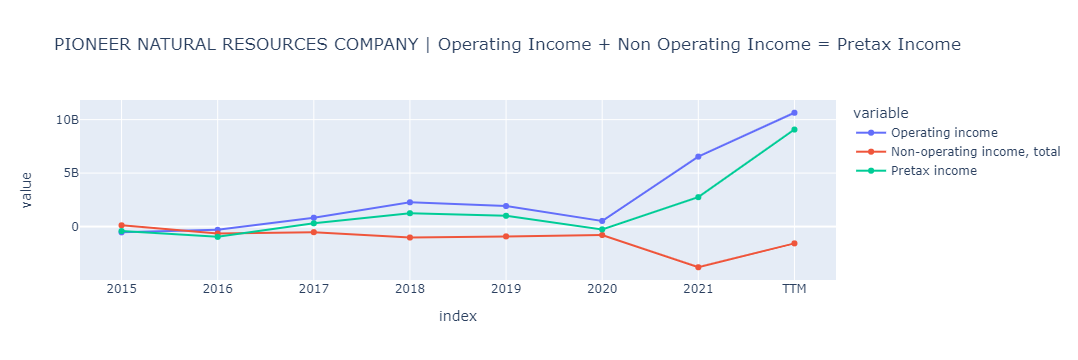

In [5]:
company_income_statement.pretax_income()

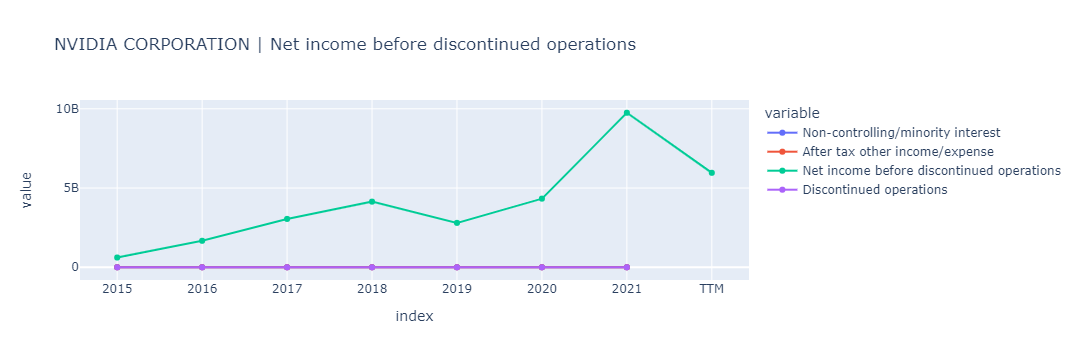

In [8]:
company_income_statement.discontinued_operations()

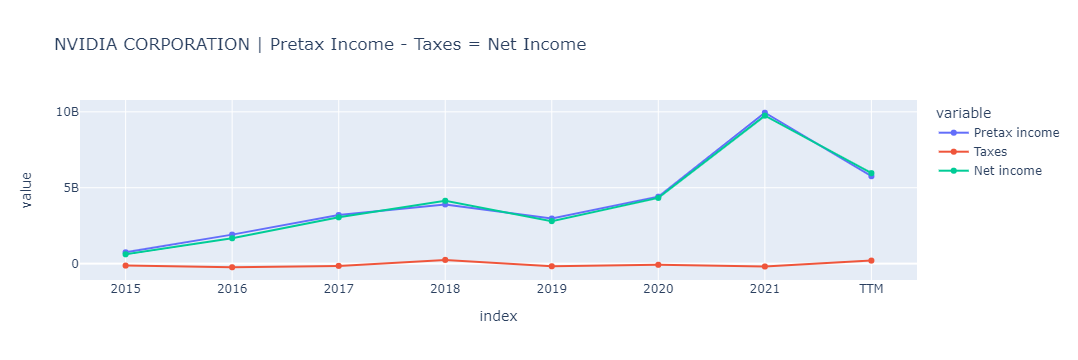

In [9]:
company_income_statement.net_income()

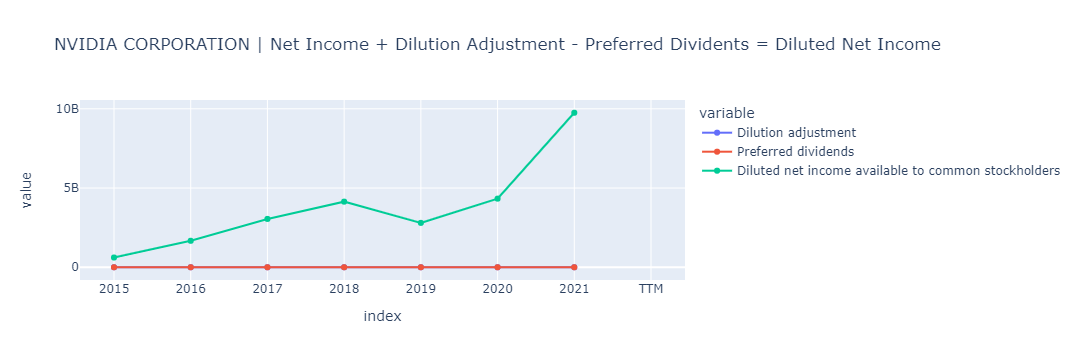

In [10]:
company_income_statement.diluted_net_income()

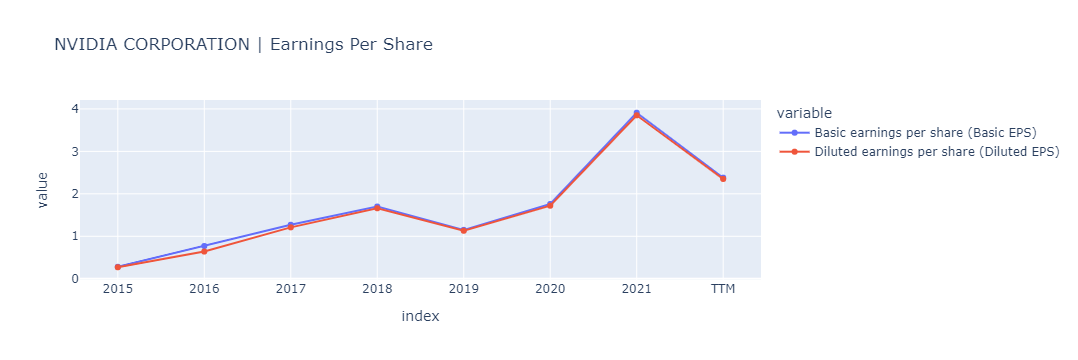

In [11]:
company_income_statement.eps()

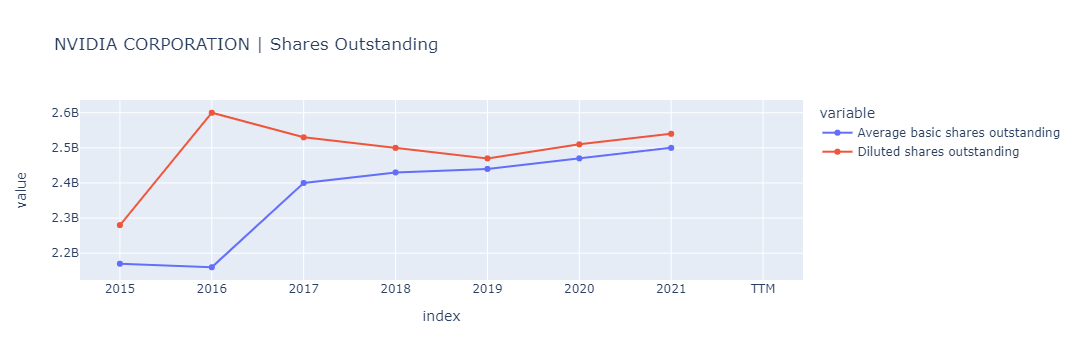

In [12]:
company_income_statement.shares()

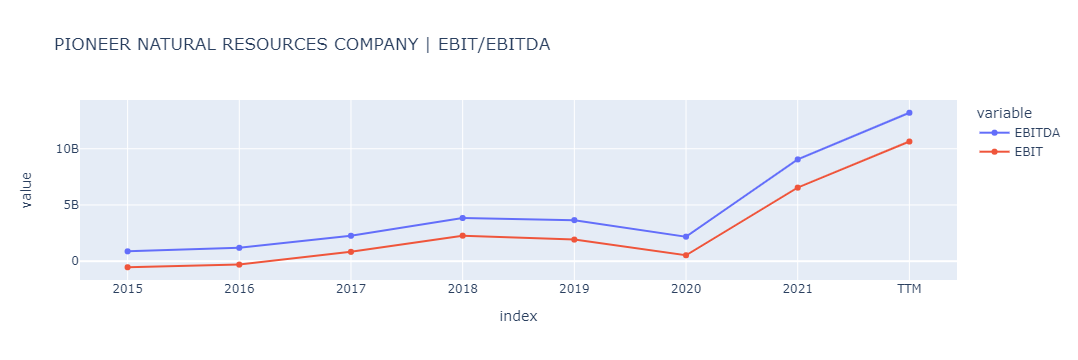

In [6]:
company_income_statement.ebit()

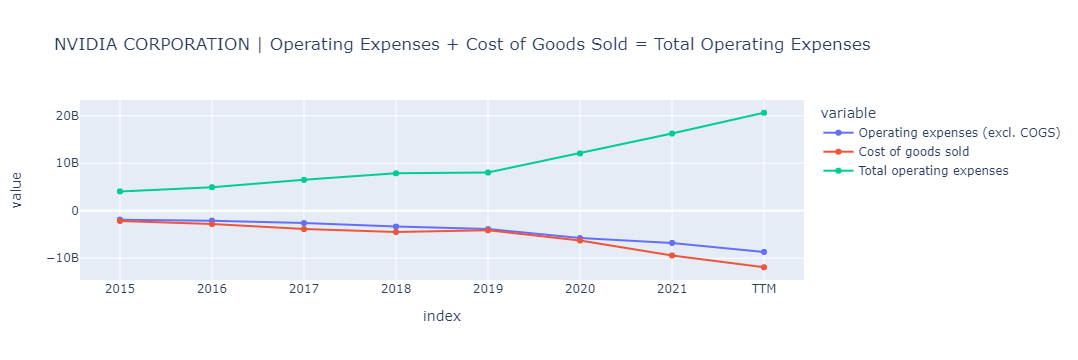

In [14]:
company_income_statement.operating_expenses()

In [ ]:
# temp2 = CompareCompanies_Statistics(companies_data=companies_data)
# temp2.total_comon_shares_outstanding()


# income_stat_params = IncomeStatementVisualizer(company_data=companies_data[0])
# balanse_sh_params = BalanceSheetVisualizer(company_data=companies_data[0])
# cashflow_params = CashflowStatementVisualizer(company_data=companies_data[0])
# statistics_params = StatisticsRatiosVisualizer(company_data=companies_data[0])

# print(statistics_params.total_common_shares_outstanding_str)

# Excel.start() #generate Excel file
compare = CompareCompaniesVisualizer(companies_data=companies_data)
compare.income_statement_visualizer(compare.income_stat_params.total_revenue_str)

#compare income statement
# compare.income_statement(parameter_name=income_stat_params.total_revenue_str)
# compare.income_statement(parameter_name=income_stat_params.cost_of_goods_sold_str)
# compare.income_statement(parameter_name=income_stat_params.deprecation_and_amortization_str)
# compare.income_statement(parameter_name=income_stat_params.depreciation_str)
# compare.income_statement(parameter_name=income_stat_params.amortization_of_intangibles_str)
# compare.income_statement(parameter_name=income_stat_params.amortization_of_deferred_charges_str)
# compare.income_statement(parameter_name=income_stat_params.other_cost_of_goods_sold_str)
# compare.income_statement(parameter_name=income_stat_params.gross_profit_str)
# compare.income_statement(parameter_name=income_stat_params.operating_expenses_excl_cogs_str)
# compare.income_statement(parameter_name=income_stat_params.selling_general_admin_expenses_total_str)
# compare.income_statement(parameter_name=income_stat_params.research_and_development_str)
# compare.income_statement(parameter_name=income_stat_params.selling_general_admin_expenses_other_str)
# compare.income_statement(parameter_name=income_stat_params.other_operating_expenses_total_str)
# compare.income_statement(parameter_name=income_stat_params.operating_income_str)
# compare.income_statement(parameter_name=income_stat_params.non_operating_income_total_str)
# compare.income_statement(parameter_name=income_stat_params.interest_expense_net_of_interest_capitalized_str)
# compare.income_statement(parameter_name=income_stat_params.interest_expense_on_debt_str)
# compare.income_statement(parameter_name=income_stat_params.interest_capitalized_str)
# compare.income_statement(parameter_name=income_stat_params.non_operating_income_excl_interest_expenses_str)
# compare.income_statement(parameter_name=income_stat_params.non_operating_interest_income_str)
# compare.income_statement(parameter_name=income_stat_params.pretax_equity_in_earnings_str)
# compare.income_statement(parameter_name=income_stat_params.miscellaneous_non_operating_expense_str)
# compare.income_statement(parameter_name=income_stat_params.unusual_income_expense_str)
# compare.income_statement(parameter_name=income_stat_params.impairments_str)
# compare.income_statement(parameter_name=income_stat_params.restructuring_charge_str)
# compare.income_statement(parameter_name=income_stat_params.legal_claim_expense_str)
# compare.income_statement(parameter_name=income_stat_params.unrealized_gain_loss_str)
# compare.income_statement(parameter_name=income_stat_params.other_exceptional_charges_str)
# compare.income_statement(parameter_name=income_stat_params.pretax_income_str)
# compare.income_statement(parameter_name=income_stat_params.equity_in_earnings_str)
# compare.income_statement(parameter_name=income_stat_params.taxes_str)
# compare.income_statement(parameter_name=income_stat_params.income_tax_current_str)
# compare.income_statement(parameter_name=income_stat_params.income_tax_current_domestic_str)
# compare.income_statement(parameter_name=income_stat_params.income_tax_current_foreign_str)
# compare.income_statement(parameter_name=income_stat_params.income_tax_deferred_str)
# compare.income_statement(parameter_name=income_stat_params.income_tax_deferred_domestic_str)
# compare.income_statement(parameter_name=income_stat_params.income_tax_deferred_foreign_str)
# compare.income_statement(parameter_name=income_stat_params.income_tax_credits_str)
# compare.income_statement(parameter_name=income_stat_params.non_controlling_minority_interest_str)
# compare.income_statement(parameter_name=income_stat_params.after_tax_other_income_expense_str)
# compare.income_statement(parameter_name=income_stat_params.net_income_before_discontinued_operations_str)
# compare.income_statement(parameter_name=income_stat_params.discontinued_operations_str)
# compare.income_statement(parameter_name=income_stat_params.net_income_str)
# compare.income_statement(parameter_name=income_stat_params.dilution_adjustment_str)
# compare.income_statement(parameter_name=income_stat_params.preferred_dividends_str)
# compare.income_statement(parameter_name=income_stat_params.diluted_net_income_available_to_common_stockholders_str)
# compare.income_statement(parameter_name=income_stat_params.basic_earnings_per_share_basic_eps_str)
# compare.income_statement(parameter_name=income_stat_params.diluted_earnings_per_share_diluted_eps_str)
# compare.income_statement(parameter_name=income_stat_params.average_basic_shares_outstanding_str)
# compare.income_statement(parameter_name=income_stat_params.diluted_shares_outstanding_str)
# compare.income_statement(parameter_name=income_stat_params.ebitda_str)
# compare.income_statement(parameter_name=income_stat_params.ebit_str)
# compare.income_statement(parameter_name=income_stat_params.total_operating_expenses_str)


#compare statistics/ratios
# compare.statistics_ratios(parameter_name=statistics_params.total_common_shares_outstanding_str)
# compare.statistics_ratios(parameter_name=statistics_params.float_shares_outstanding_str)
# compare.statistics_ratios(parameter_name=statistics_params.number_of_employees_str)
# compare.statistics_ratios(parameter_name=statistics_params.number_of_shareholders_str)
# compare.statistics_ratios(parameter_name=statistics_params.price_to_earnings_ratio_str)
# compare.statistics_ratios(parameter_name=statistics_params.price_to_sales_ratio_str)
# compare.statistics_ratios(parameter_name=statistics_params.price_to_cash_flow_ratio_str)
# compare.statistics_ratios(parameter_name=statistics_params.price_to_book_ratio_str)
# compare.statistics_ratios(parameter_name=statistics_params.enterprise_value_str)
# compare.statistics_ratios(parameter_name=statistics_params.enterprise_value_to_ebitda_ratio_str)
# compare.statistics_ratios(parameter_name=statistics_params.return_on_assets_percent_str)
# compare.statistics_ratios(parameter_name=statistics_params.return_on_equity_percent_str)
# compare.statistics_ratios(parameter_name=statistics_params.return_on_invested_capital_percent_str)
# compare.statistics_ratios(parameter_name=statistics_params.gross_margin_percent_str)
# compare.statistics_ratios(parameter_name=statistics_params.operating_margin_percent_str)
# compare.statistics_ratios(parameter_name=statistics_params.ebitda_margin_percent_str)
# compare.statistics_ratios(parameter_name=statistics_params.net_margin_percent_str)
# compare.statistics_ratios(parameter_name=statistics_params.quick_ratio_str)
# compare.statistics_ratios(parameter_name=statistics_params.current_ratio_str)
# compare.statistics_ratios(parameter_name=statistics_params.inventory_turnover_str)
# compare.statistics_ratios(parameter_name=statistics_params.asset_turnover_str)
# compare.statistics_ratios(parameter_name=statistics_params.debt_to_assets_ratio_str)
# compare.statistics_ratios(parameter_name=statistics_params.debt_to_equity_ratio_str)
# compare.statistics_ratios(parameter_name=statistics_params.long_term_debt_to_total_assets_ratio_str)



In [6]:
data = {'company_url':'self.company_url',
                'income_statement_url': 'self.income_statement_url',
                'balanse_sheet_url': 'self.balanse_sheet_url',
                'cashflow_url': 'self.cashflow_url',
                'statistics_url': 'self.statistics_url',
                'company_data_url': 'self.company_data_url',
                'company_name':'self.company_name',
                'company_ticker': 'self.company_ticker',
                "exchange": 'self.exchange'}

company_data = pd.DataFrame.from_dict(data, orient='index', columns=['value'])
company_data

,value
company_url,self.company_url
income_statement_url,self.income_statement_url
balanse_sheet_url,self.balanse_sheet_url
cashflow_url,self.cashflow_url
statistics_url,self.statistics_url
company_data_url,self.company_data_url
company_name,self.company_name
company_ticker,self.company_ticker
exchange,self.exchange
